In [1]:
# Load Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Data from SQLite Database
DB_PATH = "../data/train_delays.db"
def load_data():
    """Load merged train delay data from SQLite."""
    conn = sqlite3.connect(DB_PATH)

    df_schedule = pd.read_sql("SELECT * FROM train_schedule", conn)
    df_weather = pd.read_sql("SELECT * FROM weather_conditions", conn)
    df_congestion = pd.read_sql("SELECT * FROM congestion_levels", conn)
    df_delays = pd.read_sql("SELECT * FROM train_delays", conn)

    conn.close()

    # Merge Data
    df = (df_schedule
          .merge(df_weather, on="Train ID")
          .merge(df_congestion, on="Train ID")
          .merge(df_delays, on="Train ID"))
    
    return df

#  Load Dataset
df = load_data()


In [3]:
#  Quick Overview of Data
print("📊 Data Preview:")
display(df.head())


📊 Data Preview:


,Train ID,Scheduled Time,Day of Week,Weather,Congestion Level,Actual Time,Delay (min)
0,T00001,20:07,Saturday,Clear,6,20:54,47.50
1,T00002,08:15,Tuesday,Cloudy,7,09:14,59.15
2,T00003,23:06,Saturday,Snow,4,23:44,38.19
3,T00004,17:05,Thursday,Storm,0,17:30,25.75
4,T00005,01:01,Tuesday,Clear,8,01:23,22.22


In [4]:
# Check for Missing Values
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
Train ID            0
Scheduled Time      0
Day of Week         0
Weather             0
Congestion Level    0
Actual Time         0
Delay (min)         0
dtype: int64


In [5]:
#  Convert Time to Minutes
def time_to_minutes(time_str):
    """Convert HH:MM time format to minutes since midnight."""
    h, m = map(int, time_str.split(":"))
    return h * 60 + m

df["Scheduled Time"] = df["Scheduled Time"].apply(time_to_minutes)
df["Actual Time"] = df["Actual Time"].apply(time_to_minutes)


In [6]:
#  Summary Statistics
print("\n Summary Statistics:")
display(df.describe())



 Summary Statistics:


,Scheduled Time,Congestion Level,Actual Time,Delay (min)
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,733.729000,4.482600,723.871600,42.469676
std,414.949327,2.855333,416.393585,24.447807
min,0.000000,0.000000,0.000000,0.000000
25%,371.000000,2.000000,357.750000,24.477500
50%,743.000000,4.000000,731.000000,39.820000
75%,1086.000000,7.000000,1082.250000,58.105000
max,1439.000000,9.000000,1439.000000,128.660000


# -------------------------
# 📊 1. Distribution of Train Delays
# -------------------------

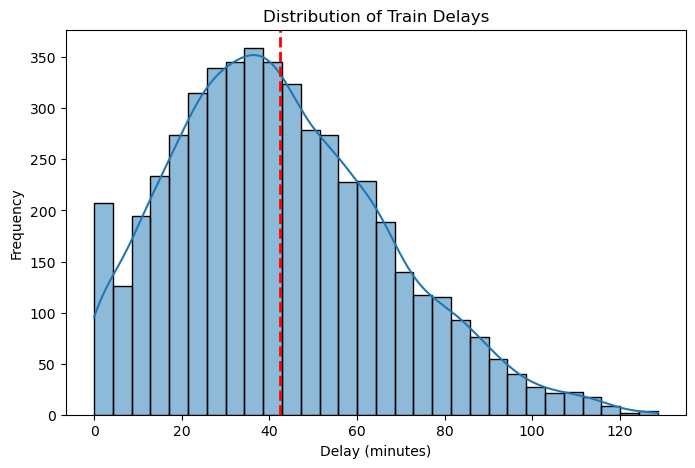

In [7]:

plt.figure(figsize=(8,5))
sns.histplot(df["Delay (min)"], bins=30, kde=True)
plt.axvline(df["Delay (min)"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Train Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

# -------------------------
# 📊 2. Impact of Weather on Delays
# -------------------------

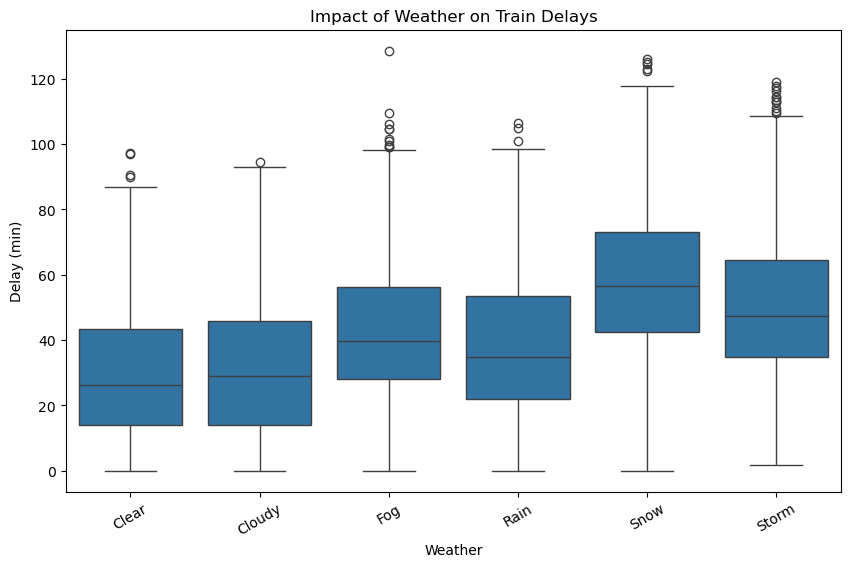

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Weather", y="Delay (min)", data=df, order=df.groupby("Weather")["Delay (min)"].median().index)
plt.xticks(rotation=30)
plt.title("Impact of Weather on Train Delays")
plt.show()

# -------------------------
# 📊 3. Congestion Levels vs. Delay Time
# -------------------------

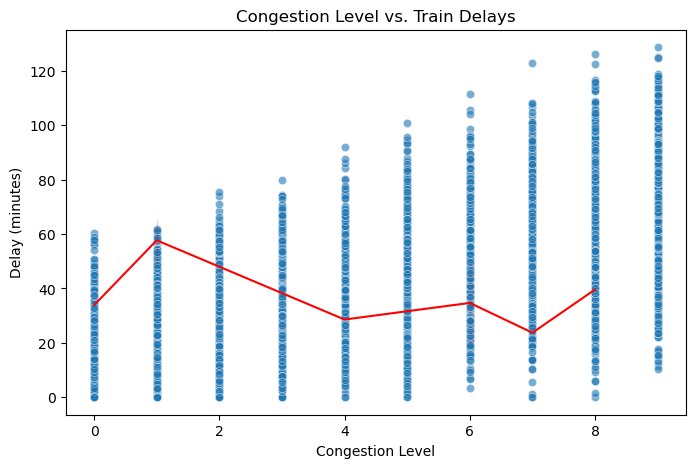

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Congestion Level", y="Delay (min)", data=df, alpha=0.6)
sns.lineplot(x="Congestion Level", y=df.groupby("Congestion Level")["Delay (min)"].mean(), data=df, color='red')
plt.title("Congestion Level vs. Train Delays")
plt.xlabel("Congestion Level")
plt.ylabel("Delay (minutes)")
plt.show()

# -------------------------
# 📊 4. Delays by Day of the Week
# -------------------------

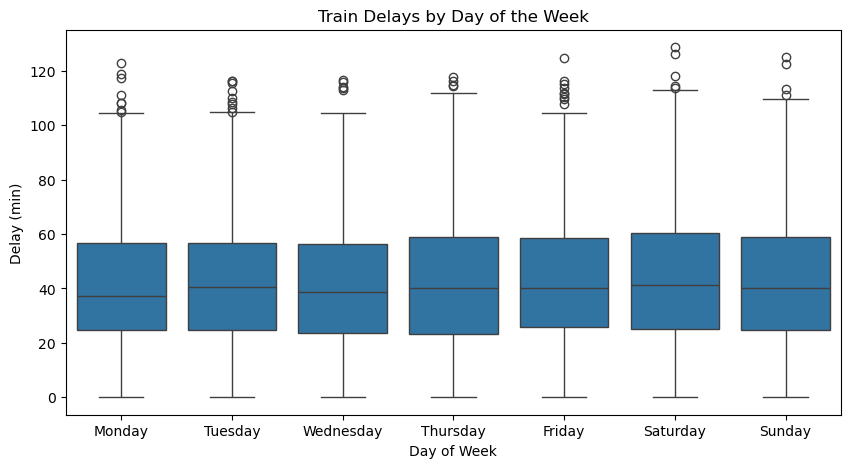

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Day of Week", y="Delay (min)", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Train Delays by Day of the Week")
plt.show()

# -------------------------
# 📊 5. Scheduled Time vs. Delays
# -------------------------

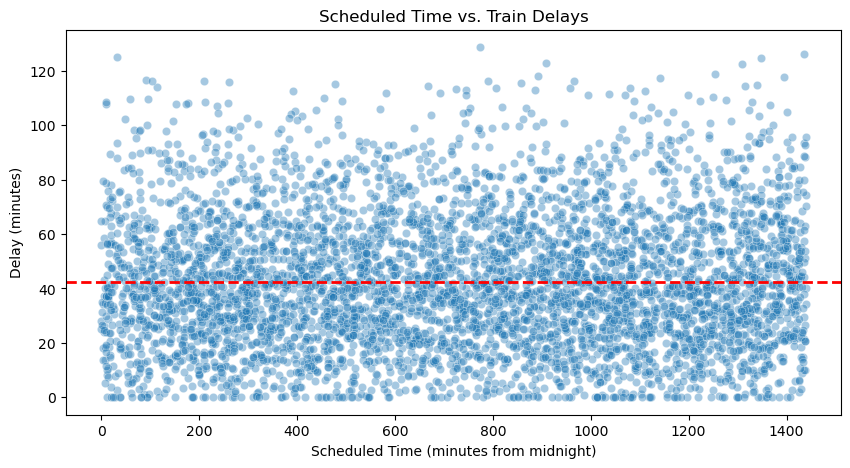

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Scheduled Time", y="Delay (min)", data=df, alpha=0.4)
plt.axhline(df["Delay (min)"].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title("Scheduled Time vs. Train Delays")
plt.xlabel("Scheduled Time (minutes from midnight)")
plt.ylabel("Delay (minutes)")
plt.show()


# -------------------------
# 📊 6. Correlation Heatmap
# -------------------------


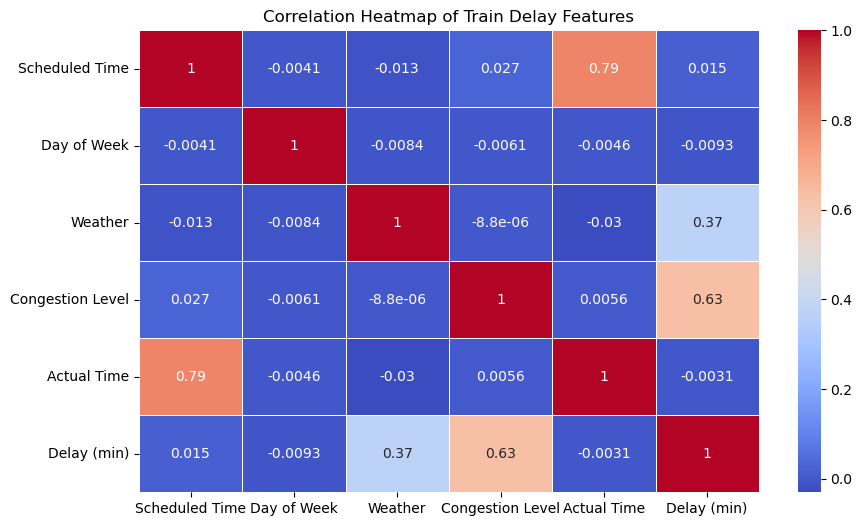

In [14]:
# Convert categorical columns to numeric
df_numeric = df.copy()
df_numeric["Day of Week"] = df_numeric["Day of Week"].astype('category').cat.codes
df_numeric["Weather"] = df_numeric["Weather"].astype('category').cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.drop(columns=["Train ID"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Train Delay Features")
plt.show()
